# Respondendo as perguntas do CEO

In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
df = pd.read_csv('csv/kc_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [20]:
#Qual o número de imóveis por ano de construção?
df[['id', 'yr_built']].groupby('yr_built').count()

id
yr_built     
1900       87
1901       29
1902       27
1903       46
1904       45
...       ...
2011      130
2012      170
2013      201
2014      559
2015       38

[116 rows x 1 columns]

In [21]:
# Qual o menor número de quartos por ano de construção?
df[['bedrooms', 'yr_built']].groupby('yr_built').min()

bedrooms
yr_built          
1900             1
1901             2
1902             2
1903             1
1904             2
...            ...
2011             1
2012             2
2013             2
2014             1
2015             1

[116 rows x 1 columns]

In [22]:
# Qual o preço de compra por cada número de quarto?
df[['price', 'bedrooms']].groupby('bedrooms').max()

price
bedrooms           
0         1295650.0
1         1247000.0
2         3278000.0
3         3800000.0
4         4489000.0
5         7062500.0
6         7700000.0
7         3200000.0
8         3300000.0
9         1400000.0
10        1148000.0
11         520000.0
33         640000.0

In [23]:
# Qual a soma de todos os preços de compra por número de quartos?
df[['price', 'bedrooms']].groupby('bedrooms').sum()

price
bedrooms              
0         5.323550e+06
1         6.321093e+07
2         1.107789e+09
3         4.580264e+09
4         4.372957e+09
5         1.259346e+09
6         2.245416e+08
7         3.614502e+07
8         1.436600e+07
9         5.363999e+06
10        2.458000e+06
11        5.200000e+05
33        6.400000e+05

In [24]:
# Qual a soma de todos os preços de compra por número de quartos e banheiros?
df[['bedrooms', 'bathrooms', 'price']].groupby(['bedrooms', 'bathrooms']).sum()

price
bedrooms bathrooms           
0        0.00       3642600.0
         0.75        265000.0
         1.00        228000.0
         1.50        288000.0
         2.50        899950.0
...                       ...
10       2.00        650000.0
         3.00        660000.0
         5.25       1148000.0
11       3.00        520000.0
33       1.75        640000.0

[144 rows x 1 columns]

In [25]:
# Qual o tamanho médio das salas por ano de construção?
df[['sqft_living', 'yr_built']].groupby('yr_built').mean()

sqft_living
yr_built             
1900      1732.011494
1901      1763.620690
1902      1919.629630
1903      1507.739130
1904      1603.177778
...               ...
2011      2313.684615
2012      2378.741176
2013      2636.592040
2014      2615.389982
2015      2596.315789

[116 rows x 1 columns]

In [26]:
# Qual o tamanho mediano das salas por ano de construção?
df[['sqft_living', 'yr_built']].groupby('yr_built').median()

sqft_living
yr_built             
1900           1540.0
1901           1610.0
1902           1600.0
1903           1505.0
1904           1280.0
...               ...
2011           2270.0
2012           2237.5
2013           2580.0
2014           2650.0
2015           2590.0

[116 rows x 1 columns]

In [27]:
# Qual o desvio-padrão do tamanho das salas dos imóveis por ano de construção?
df[['sqft_living', 'yr_built']].groupby('yr_built').std()

sqft_living
yr_built             
1900       732.944373
1901       668.231804
1902       878.659300
1903       469.723438
1904      1076.870620
...               ...
2011       804.863521
2012       771.430350
2013       883.499390
2014       893.810049
2015      1155.605425

[116 rows x 1 columns]

In [28]:
df.date = pd.to_datetime(df.date)

<BarContainer object of 2 artists>

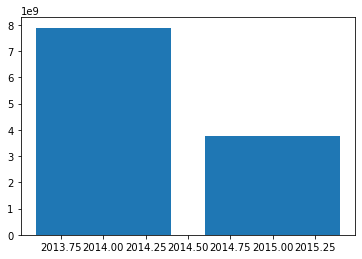

In [29]:
# Como é o crescimento médio dos preços de compra dos imóveis, 
# por ano, por dia e pela semana do ano?

# crescimento médio de preços de compras dos imóveis por ano
# eixo x: anos
# eixo y: crescimento
# gráfico de barras
## converter a coluna 'date' para o tipo 'datetime'
## criar uma coluna chamada ano derivada da coluna date.
df['year'] = df.date.dt.year
by_year_price = df[['price', 'year']].groupby('year').sum().reset_index()
plt.bar(by_year_price.year, by_year_price.price)

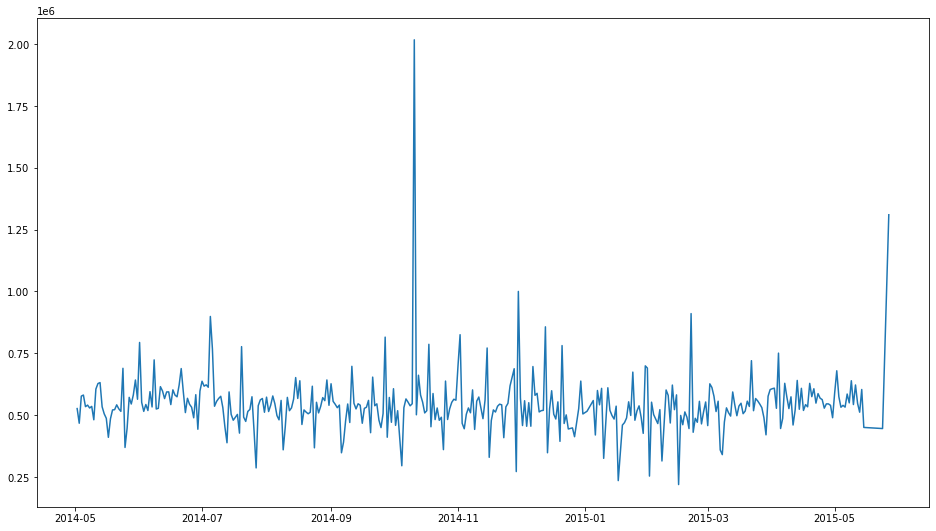

In [30]:
# segundo gráfico
df['day'] = df['date']
by_day = df[['price', 'day']].groupby('day').mean().reset_index()
plt.figure(figsize=(16, 9))
plt.plot(by_day.day, by_day.price)

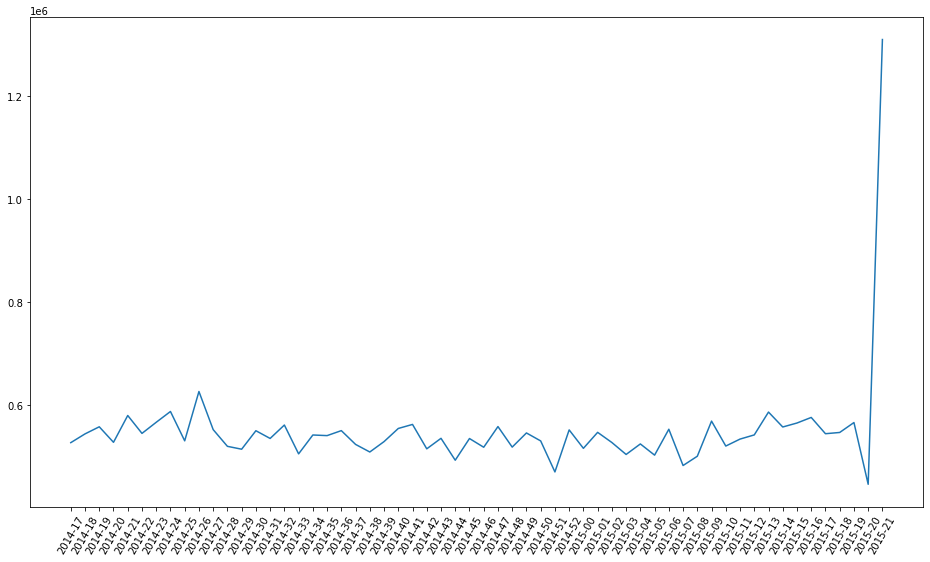

In [31]:
# terceiro gráfico
df['week'] = df.date.dt.strftime('%Y-%W')
by_year_week = df[['week', 'price']].groupby('week').mean().reset_index()
# by_year_week.week
plt.figure(figsize=[16, 9])
plt.plot(by_year_week.week, by_year_week.price)
plt.xticks(rotation=60);

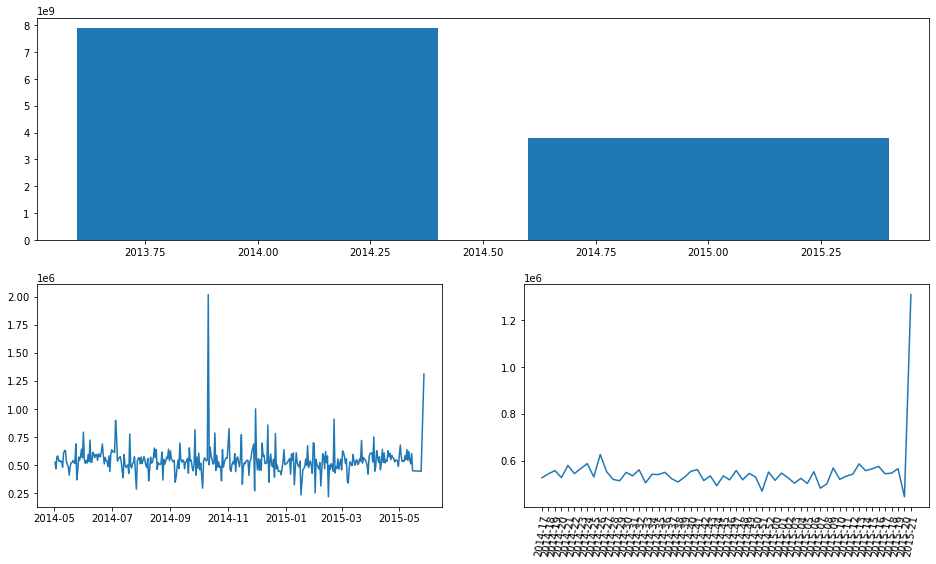

In [32]:
from matplotlib import gridspec

fig = plt.figure(figsize=[16, 9])
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0, :]) 
ax2 = fig.add_subplot(specs[1, 0]) 
ax3 = fig.add_subplot(specs[1, 1]) 
ax1.bar(by_year_price.year, by_year_price.price)

ax2.plot(by_day.day, by_day.price)

ax3.plot(by_year_week.week, by_year_week.price)
plt.xticks(rotation = 80);

In [55]:
# Eu gostaria de olhar no mapa e identificar as casas com o maior preço.
import plotly.express as px
import plotly.offline as py

py.init_notebook_mode(connected=True)

houses = df[['id', 'lat', 'long', 'price']]

fig = px.scatter_mapbox(houses, 
                        lat='lat', 
                        lon='long', 
                        size='price',
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15,
                        zoom=10)

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height=600, margin={'r':0, 't':0, 'l':0, 'b':0})
fig.show()